In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2272fe79-4e8b-a2b1-a516-da6e867a5ea0)


In [3]:
import tensorflow as tf
from UNET import UNET
from processingdata import load
import matplotlib.pyplot as plt
import cv2 

In [4]:
train_ds, test_ds = load()
for x,y in train_ds.take(1):
  print(x.shape)

(16, 256, 256, 1)


In [5]:
model = UNET((256, 256, 1))

In [6]:
CALLBACKS = [tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_accuracy',
    factor = 0.1,
    patience =5)  ]

In [7]:
model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=50,
        steps_per_epoch=len(train_ds),
        callbacks = CALLBACKS,
    )


Epoch 1/50
33/33 [==============================] - 28s 353ms/step - loss: 0.4661 - accuracy: 0.8507 - val_loss: 30680.1523 - val_accuracy: 0.1113 - lr: 0.0030
Epoch 2/50
33/33 [==============================] - 9s 272ms/step - loss: 0.3170 - accuracy: 0.9104 - val_loss: 3.7016 - val_accuracy: 0.6244 - lr: 0.0030
Epoch 3/50
33/33 [==============================] - 10s 303ms/step - loss: 0.2938 - accuracy: 0.9113 - val_loss: 0.9073 - val_accuracy: 0.3286 - lr: 0.0030
Epoch 4/50
33/33 [==============================] - 9s 267ms/step - loss: 0.2667 - accuracy: 0.9145 - val_loss: 3.6751 - val_accuracy: 0.4231 - lr: 0.0030
Epoch 5/50
33/33 [==============================] - 9s 270ms/step - loss: 0.2426 - accuracy: 0.9209 - val_loss: 24.9179 - val_accuracy: 0.2411 - lr: 0.0030
Epoch 6/50
33/33 [==============================] - 9s 271ms/step - loss: 0.2211 - accuracy: 0.9261 - val_loss: 7.7332 - val_accuracy: 0.3746 - lr: 0.0030
Epoch 7/50
33/33 [==============================] - 9s 272ms/st

In [10]:
model.save("UNET.h5")

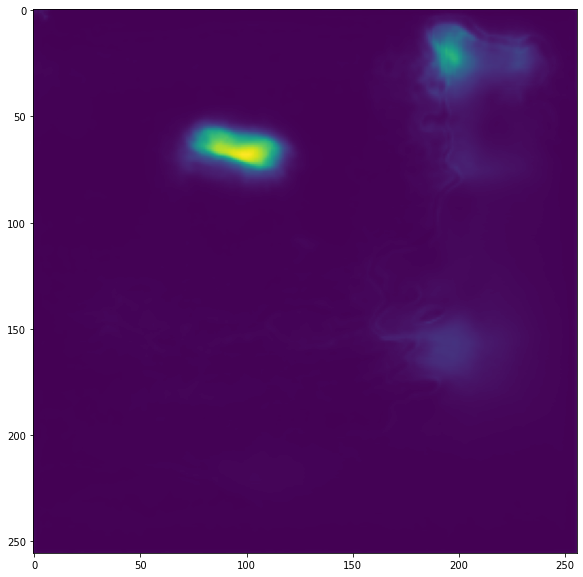

In [8]:
plt.figure(figsize=(10,10)) 
for x,y in train_ds.take(1):
  y_pred = model.predict(x)[0]
  y_pred = cv2.resize(y_pred, (256,256))
  plt.imshow(y_pred)
  plt.show()